In [ ]:
# Notch Filter

In [ ]:
import pandas as pd 
import os
import matplotlib.pyplot as plt
import numpy as np
import mne

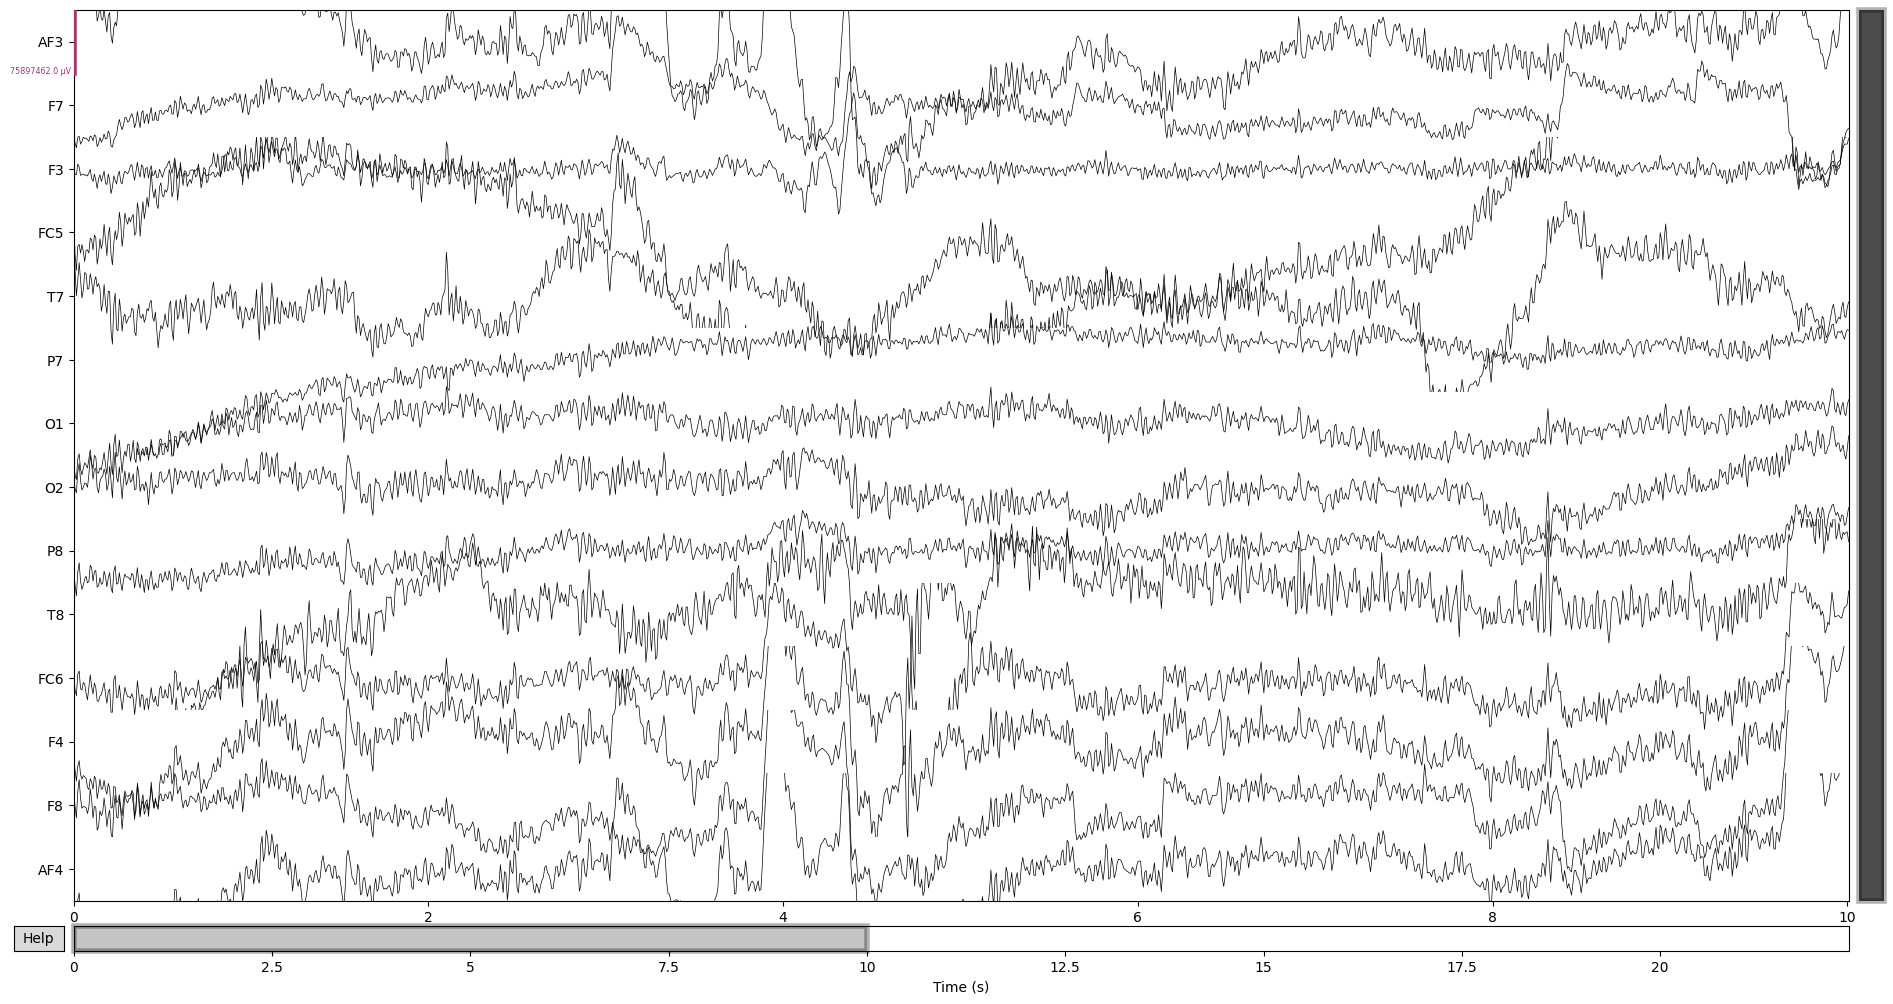

In [12]:
# import the data 

SFREQ = 128 #Hz
CH_NAMES = ['AF3', 'F7', 'F3', 'FC5', 'T7', 'P7', 'O1', 'O2', 'P8', 'T8', 'FC6', 'F4', 'F8', 'AF4']


path = '/home/isaiahrivera/Documents/Spring25/SP/Cognitive-Canvas-EEG/data/raw/raw_eeg_id_07-20250210T171013Z-001/raw_eeg_id_07/raw_eeg_allegra_left_EPOCX_268904_2025.02.10T11.11.31.05.00.md.mc.pm.fe.bp.csv'
df = pd.read_csv(path,header = 1)

eeg_columns = [ 'EEG.AF3','EEG.F7','EEG.F3','EEG.FC5','EEG.T7','EEG.P7','EEG.O1',
                'EEG.O2','EEG.P8','EEG.T8', 'EEG.FC6','EEG.F4','EEG.F8','EEG.AF4']

df_eeg = df[eeg_columns]

# import into mne (https://stackoverflow.com/questions/63172453/python-read-eeg-data-form-csv-file-using-mne)
info = mne.create_info(ch_names = CH_NAMES, sfreq = SFREQ, ch_types='eeg')
raw = mne.io.RawArray(df_eeg.transpose(), info)

raw.plot(scalings = "auto", proj=False, n_channels=len(raw.ch_names))


Effective window size : 16.000 (s)
Plotting power spectral density (dB=True).


/home/isaiahrivera/Documents/Spring25/SP/Cognitive-Canvas-EEG/venv/lib/python3.11/site-packages/mne/viz/utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


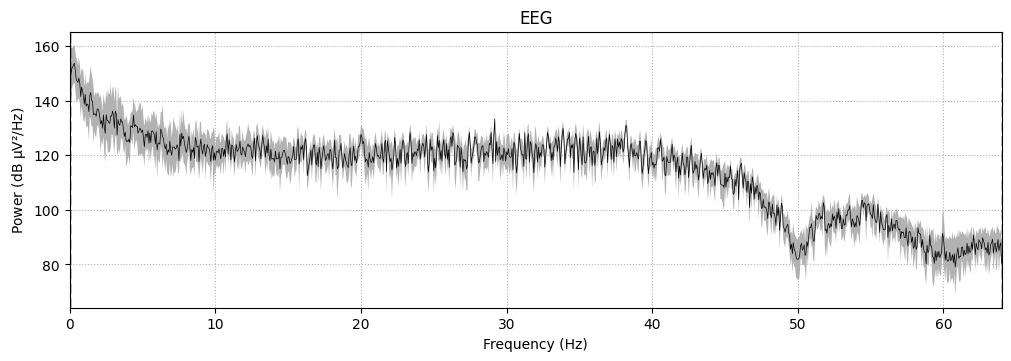

In [13]:
def add_arrows(axes):
    """Add some arrows at 60 Hz and its harmonics."""
    for ax in axes:
        freqs = ax.lines[-1].get_xdata()
        psds = ax.lines[-1].get_ydata()
        for freq in (60, 120, 180, 240):
            idx = np.searchsorted(freqs, freq)
            # get ymax of a small region around the freq. of interest
            y = psds[(idx - 4) : (idx + 5)].max()
            ax.arrow(
                x=freqs[idx],
                y=y + 18,
                dx=0,
                dy=-12,
                color="red",
                width=0.1,
                head_width=3,
                length_includes_head=True,
            )


raw.compute_psd(fmax=64).plot(
    average=True, amplitude=False, picks=raw.ch_names, exclude="bads"
)
# add_arrows(fig.axes[:2])


In [14]:
def filter(raw,start,stop):
    filtered_eeg = raw.filter(start,stop, picks='eeg')
    return filtered_eeg

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 12 - 22 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 12.00
- Lower transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 10.50 Hz)
- Upper passband edge: 22.00 Hz
- Upper transition bandwidth: 5.50 Hz (-6 dB cutoff frequency: 24.75 Hz)
- Filter length: 141 samples (1.102 s)



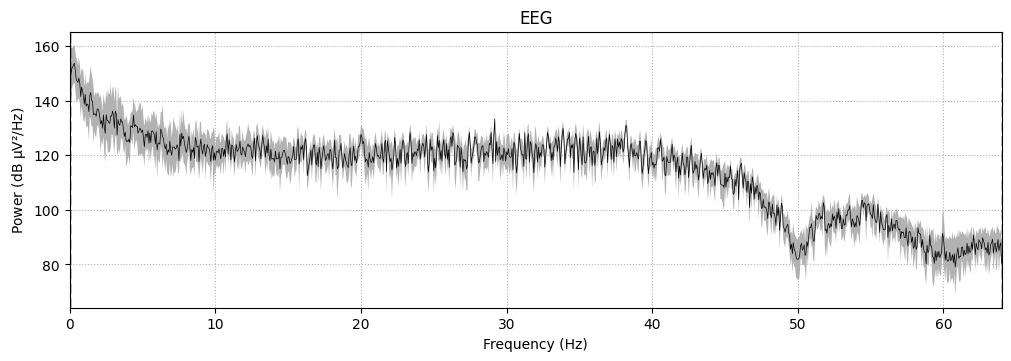

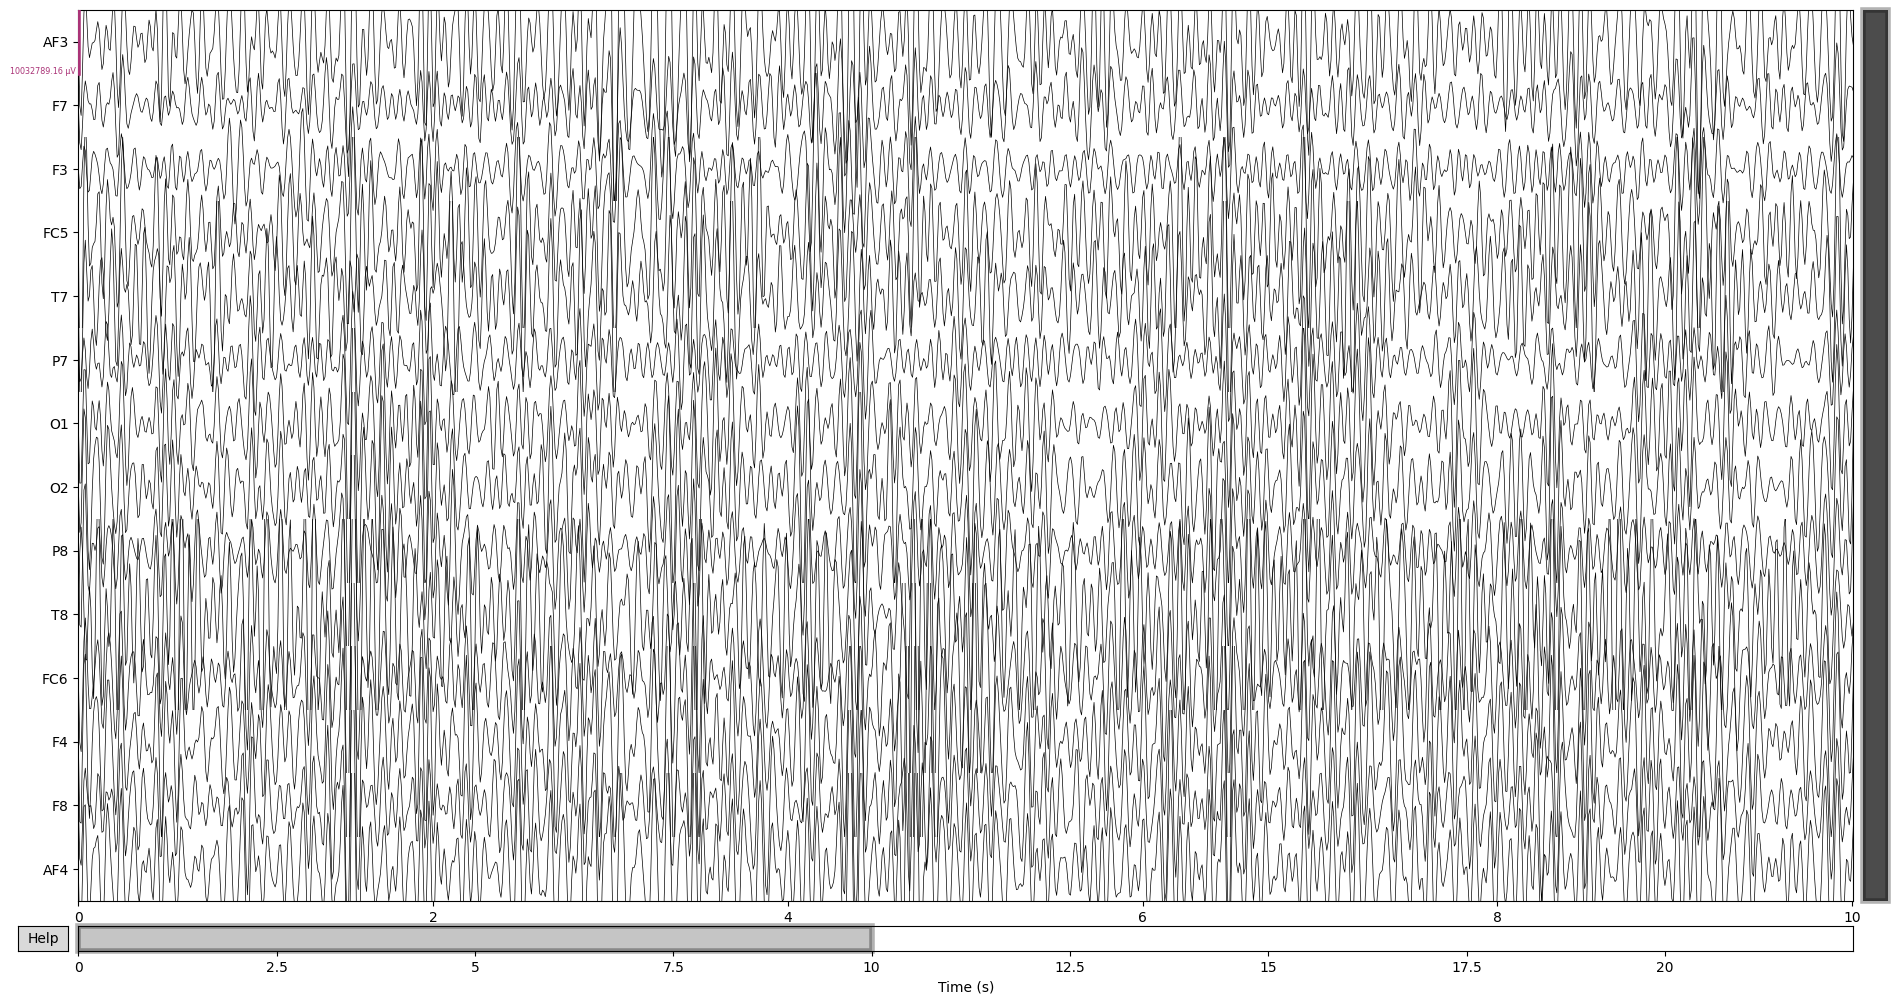

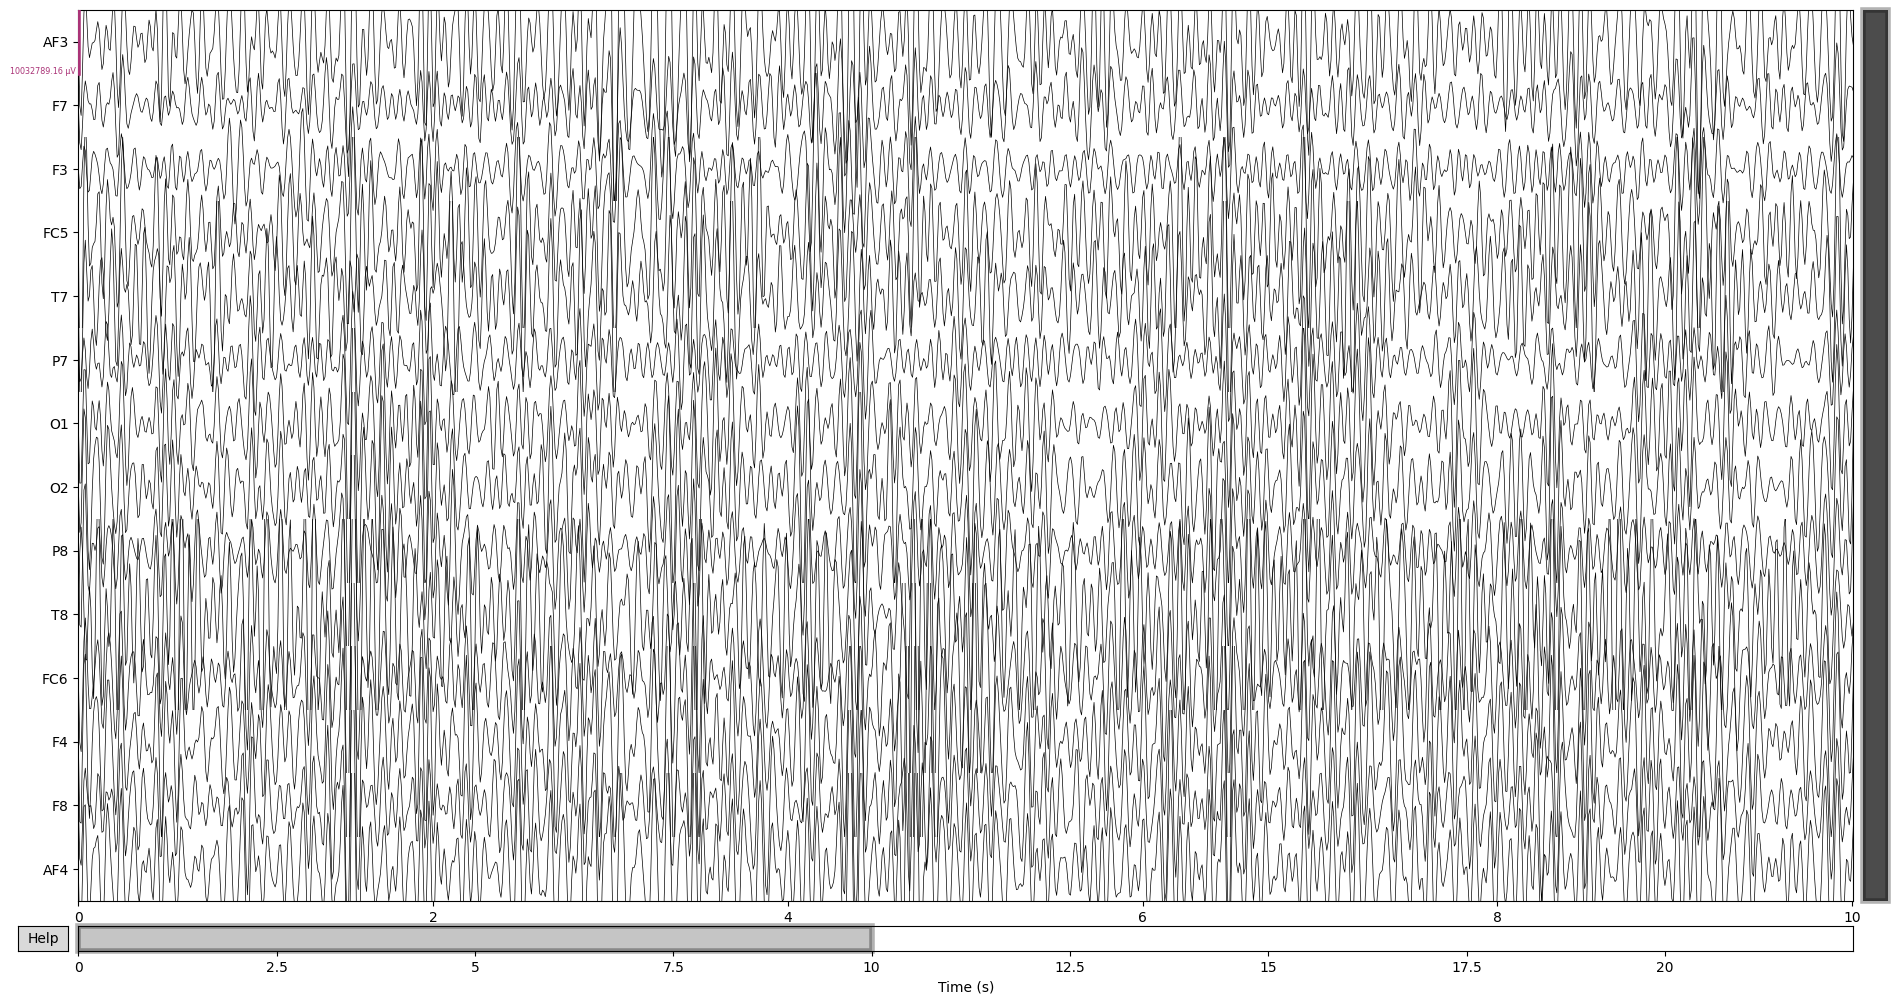

In [15]:
beta_waves = filter(raw,12,22)
beta_waves.plot(scalings = "auto")

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 13.50 Hz)
- Filter length: 213 samples (1.664 s)



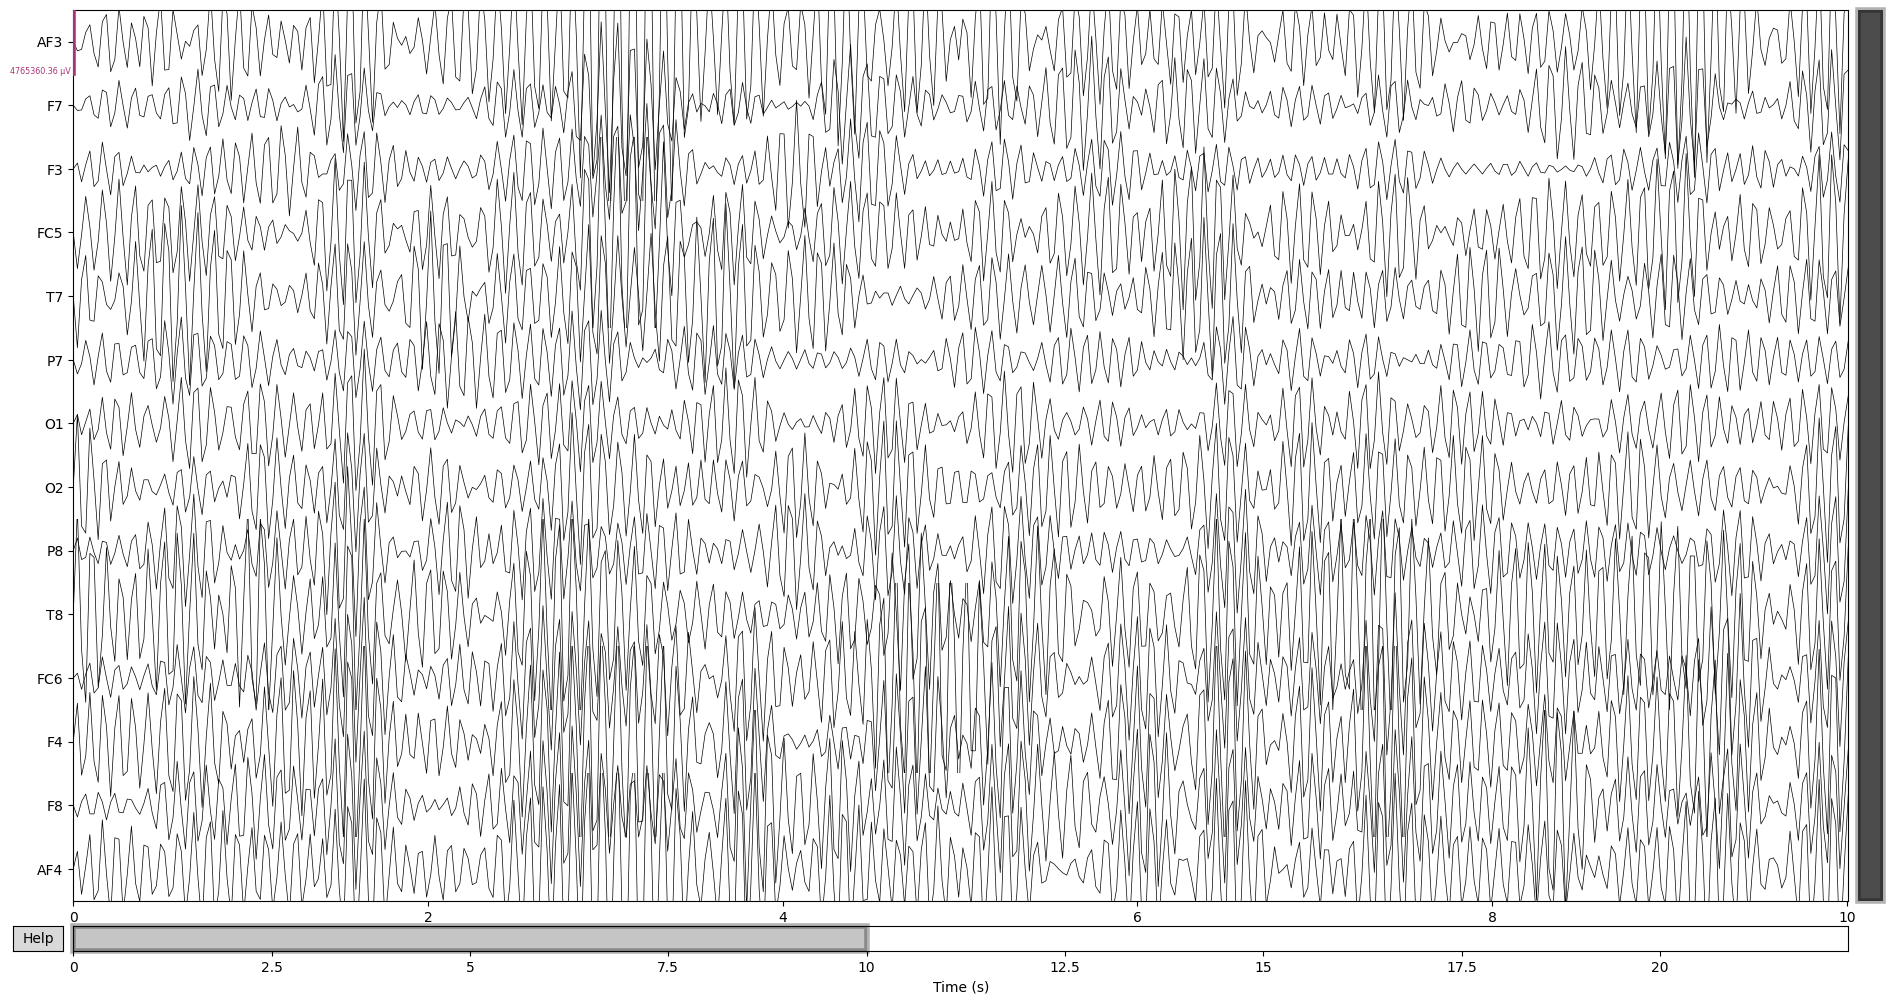

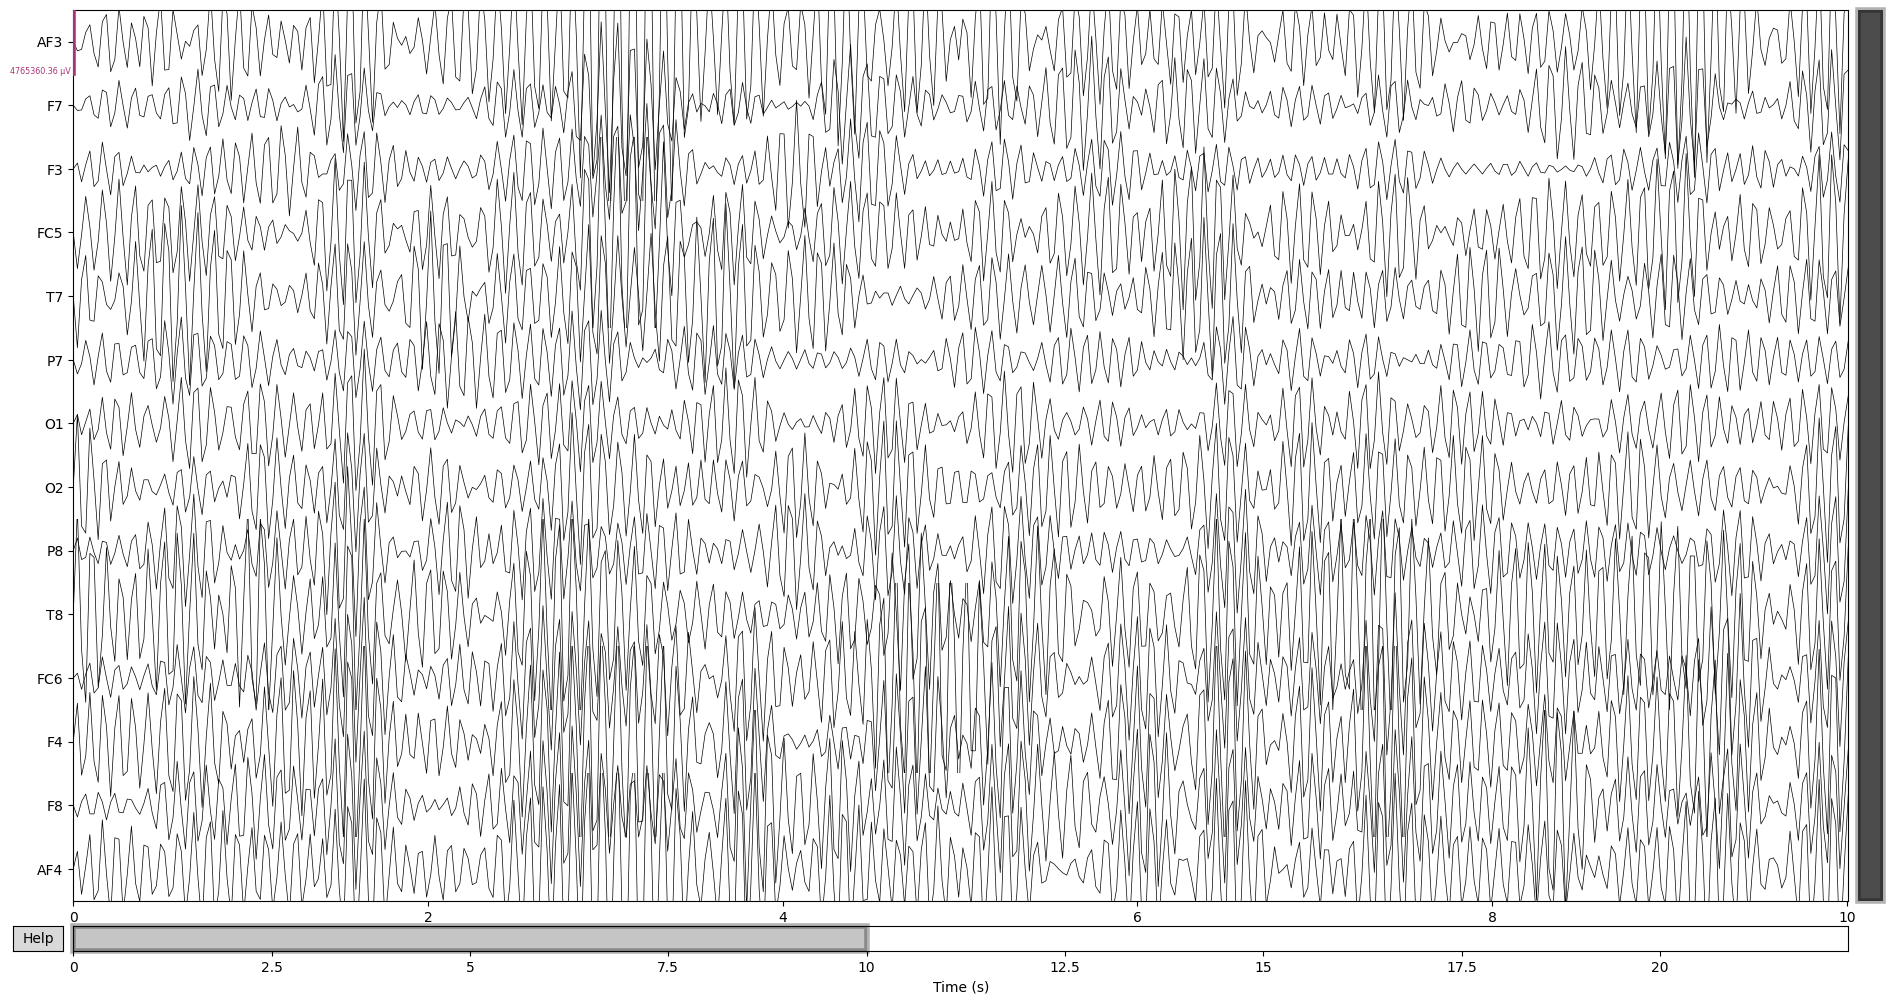

In [16]:
alpha_waves = filter(raw,8,12)
alpha_waves.plot(scalings = "auto")

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 8 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 8.00 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 9.00 Hz)
- Filter length: 213 samples (1.664 s)



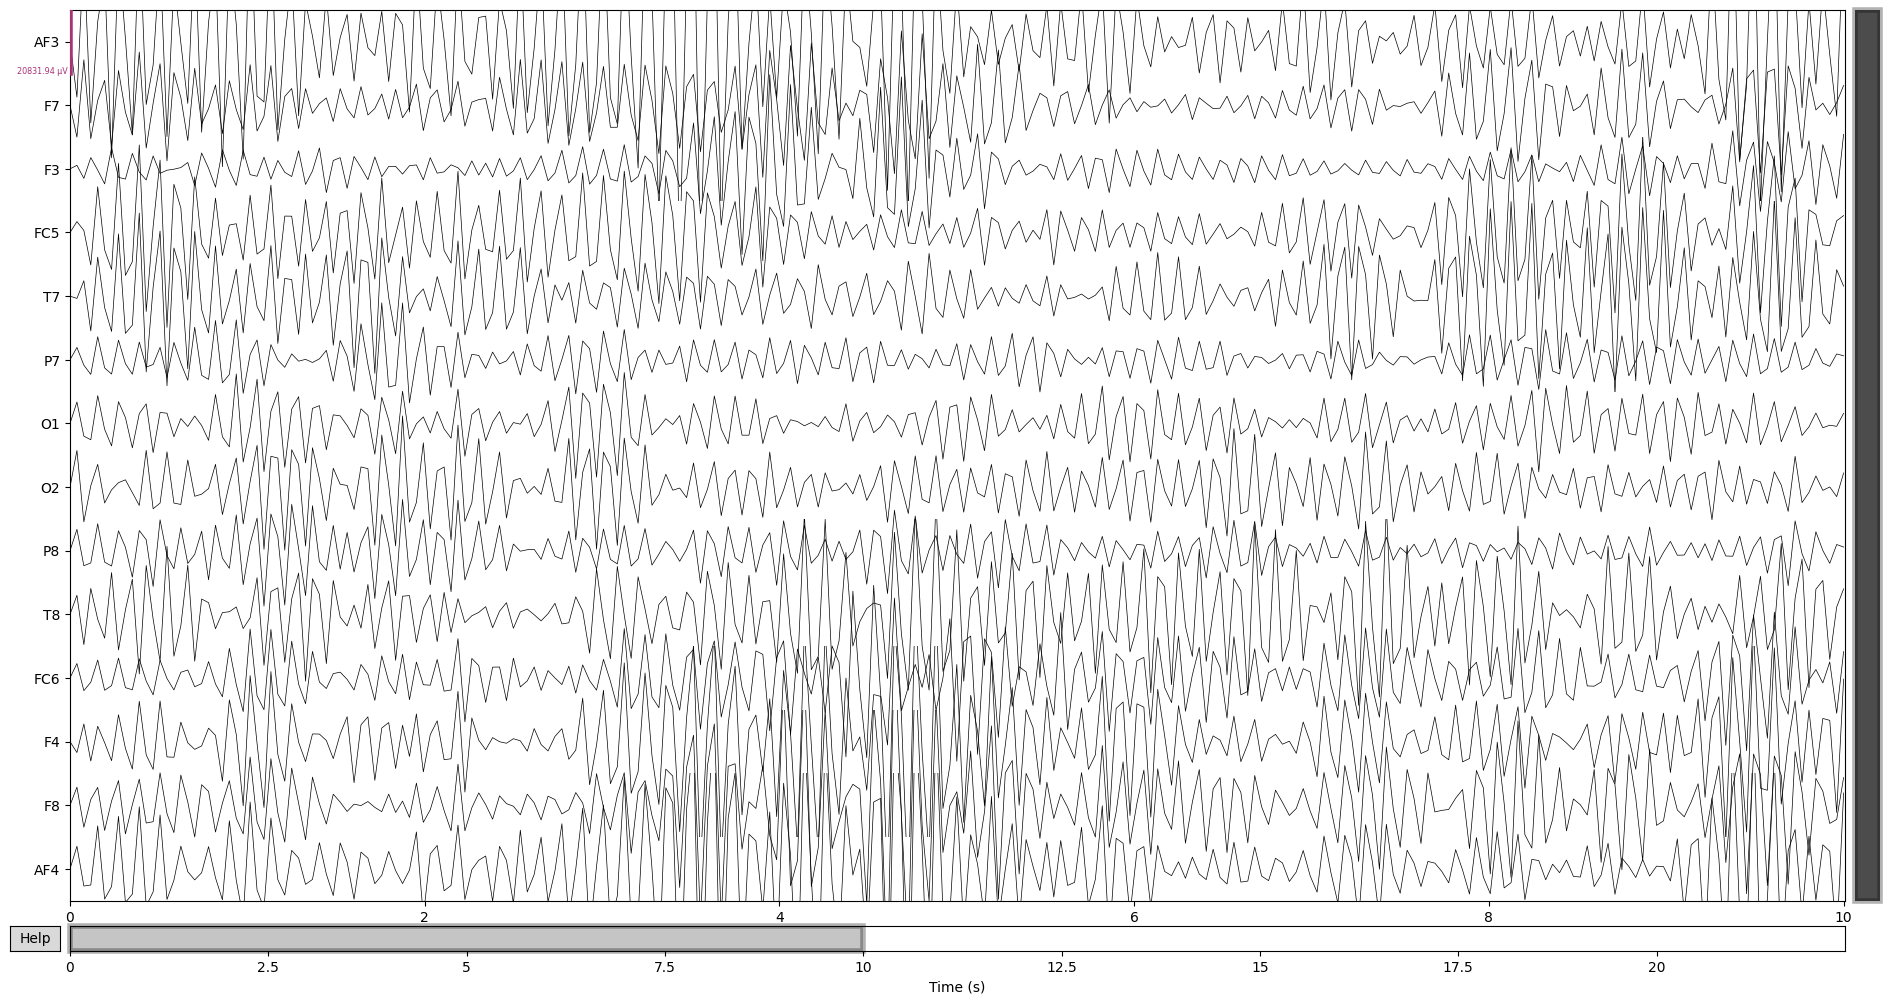

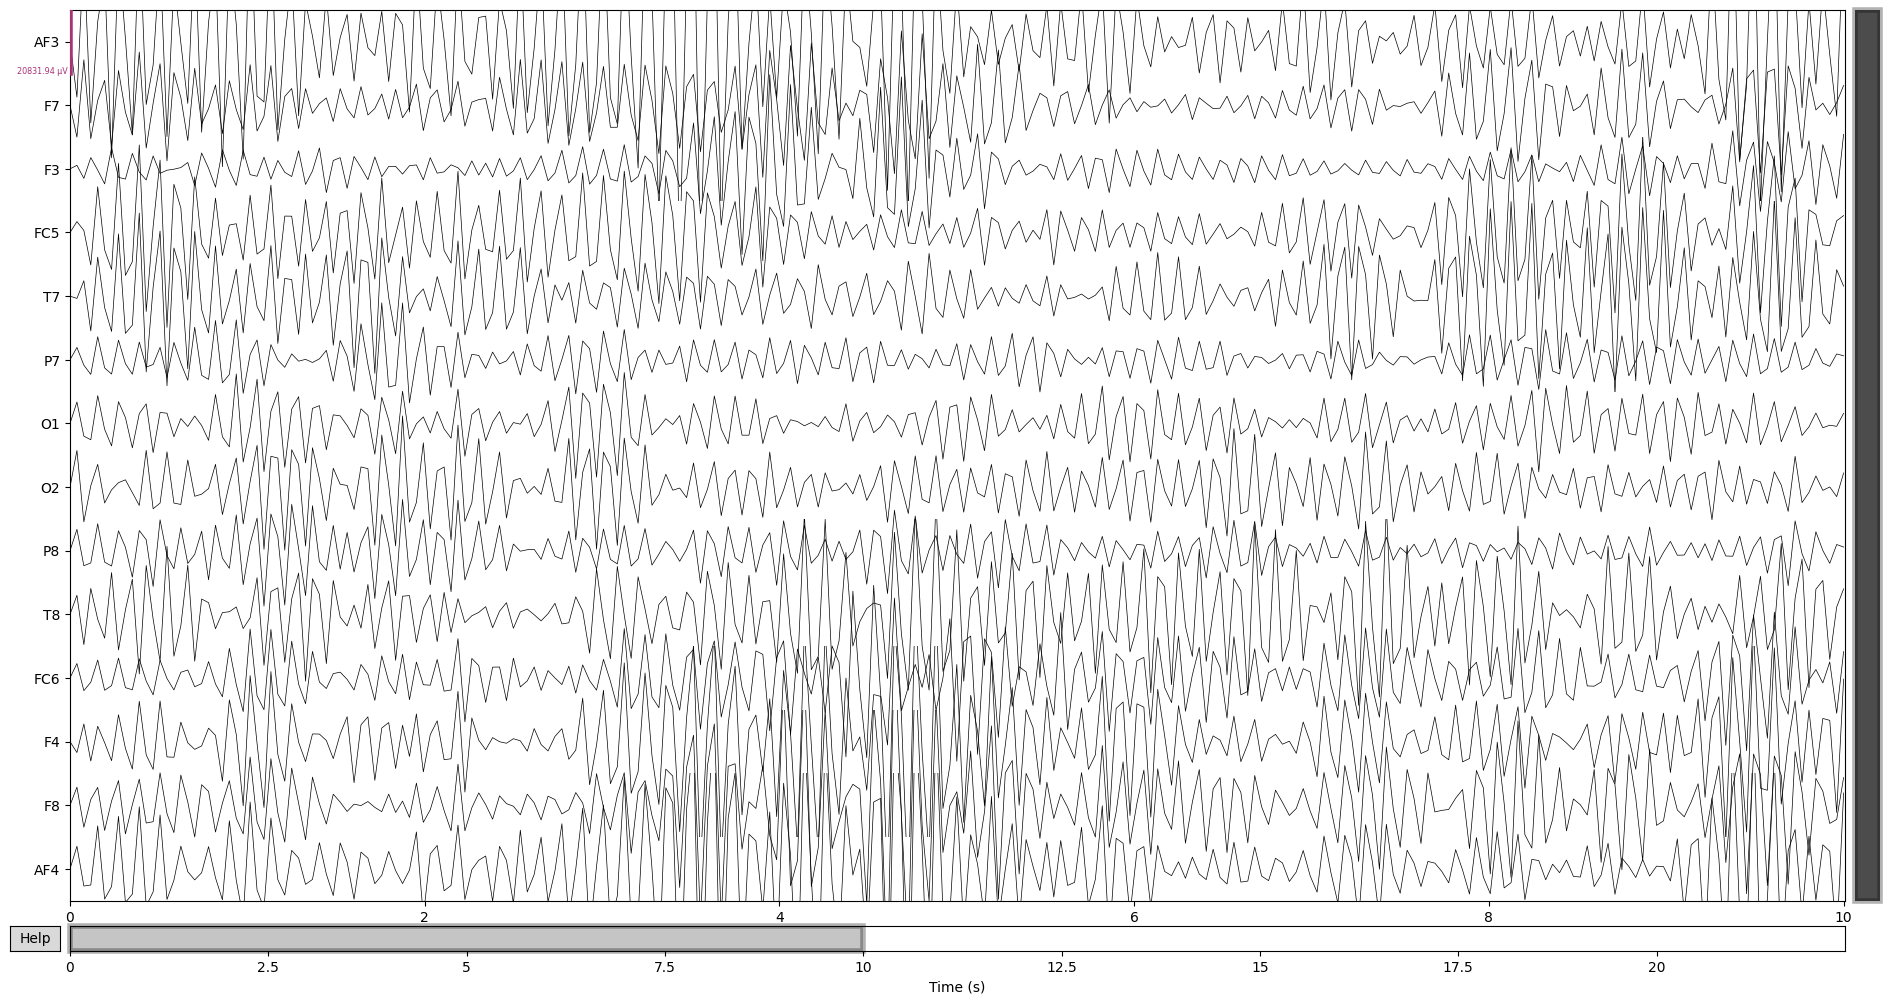

In [17]:
theta_waves = filter(raw,4,8)
theta_waves.plot(scalings = "auto")

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 4 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 4.00 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 5.00 Hz)
- Filter length: 423 samples (3.305 s)



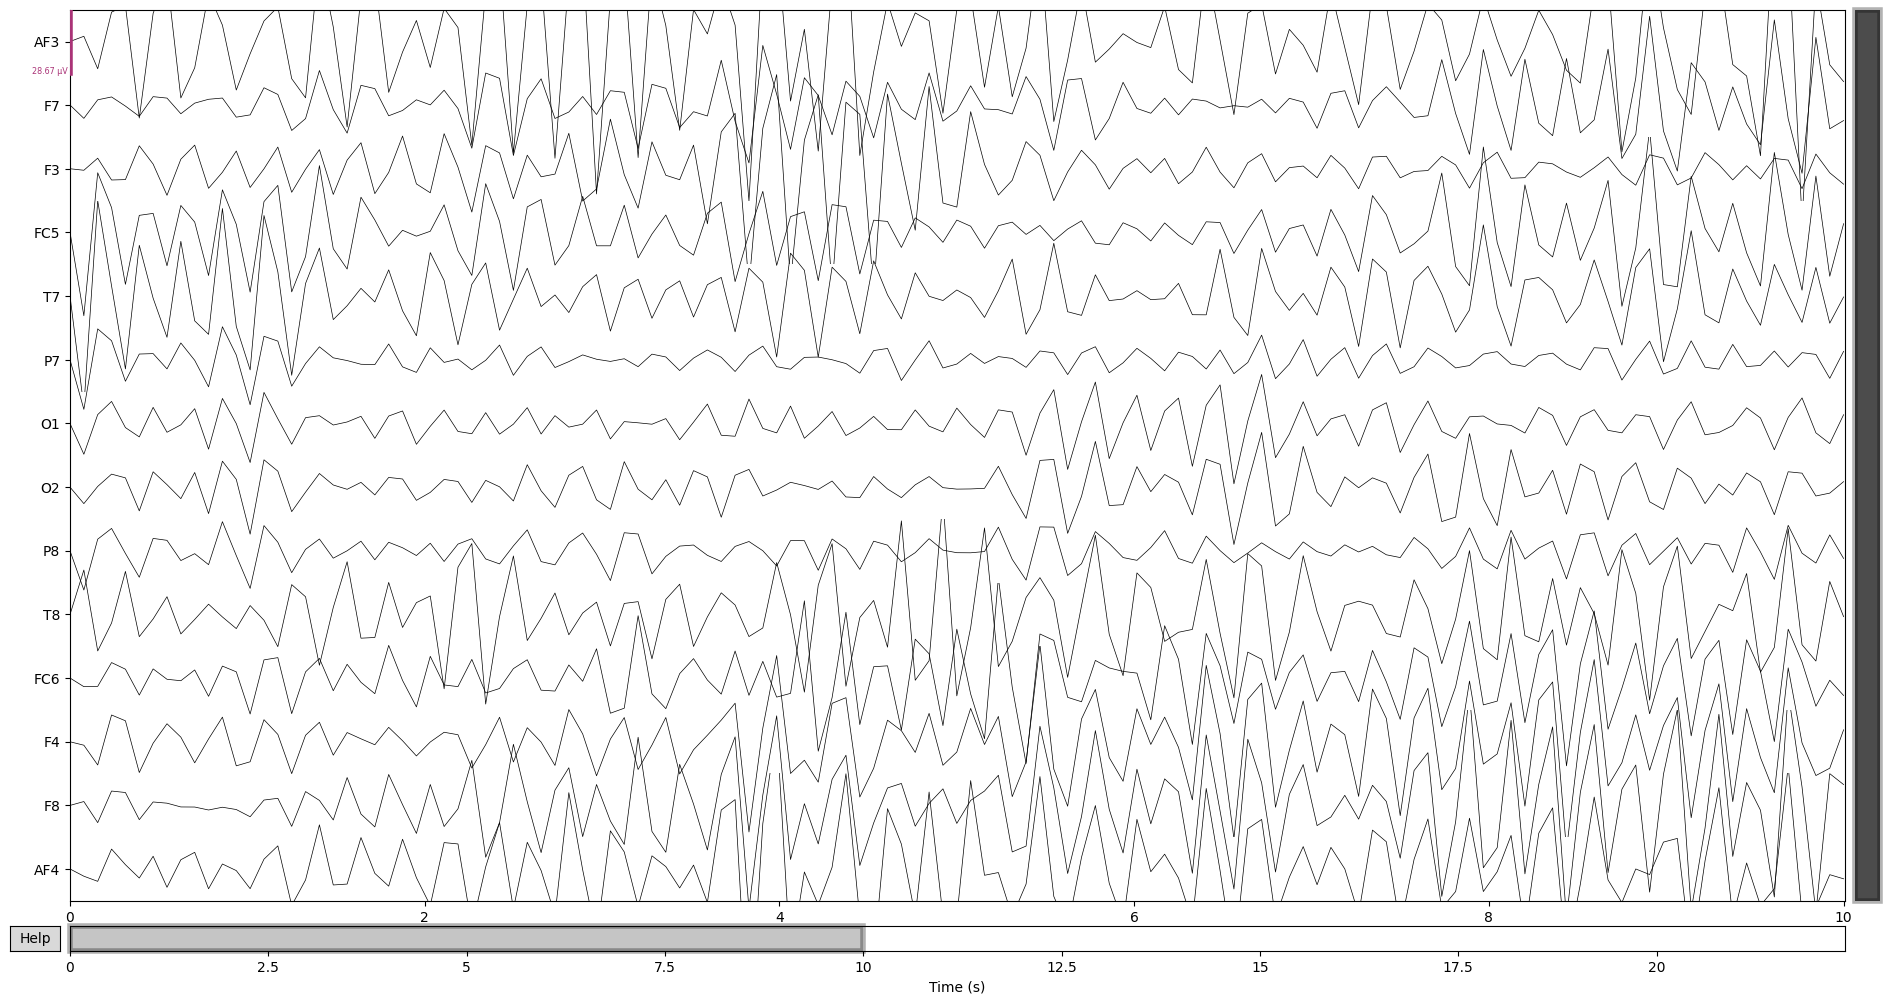

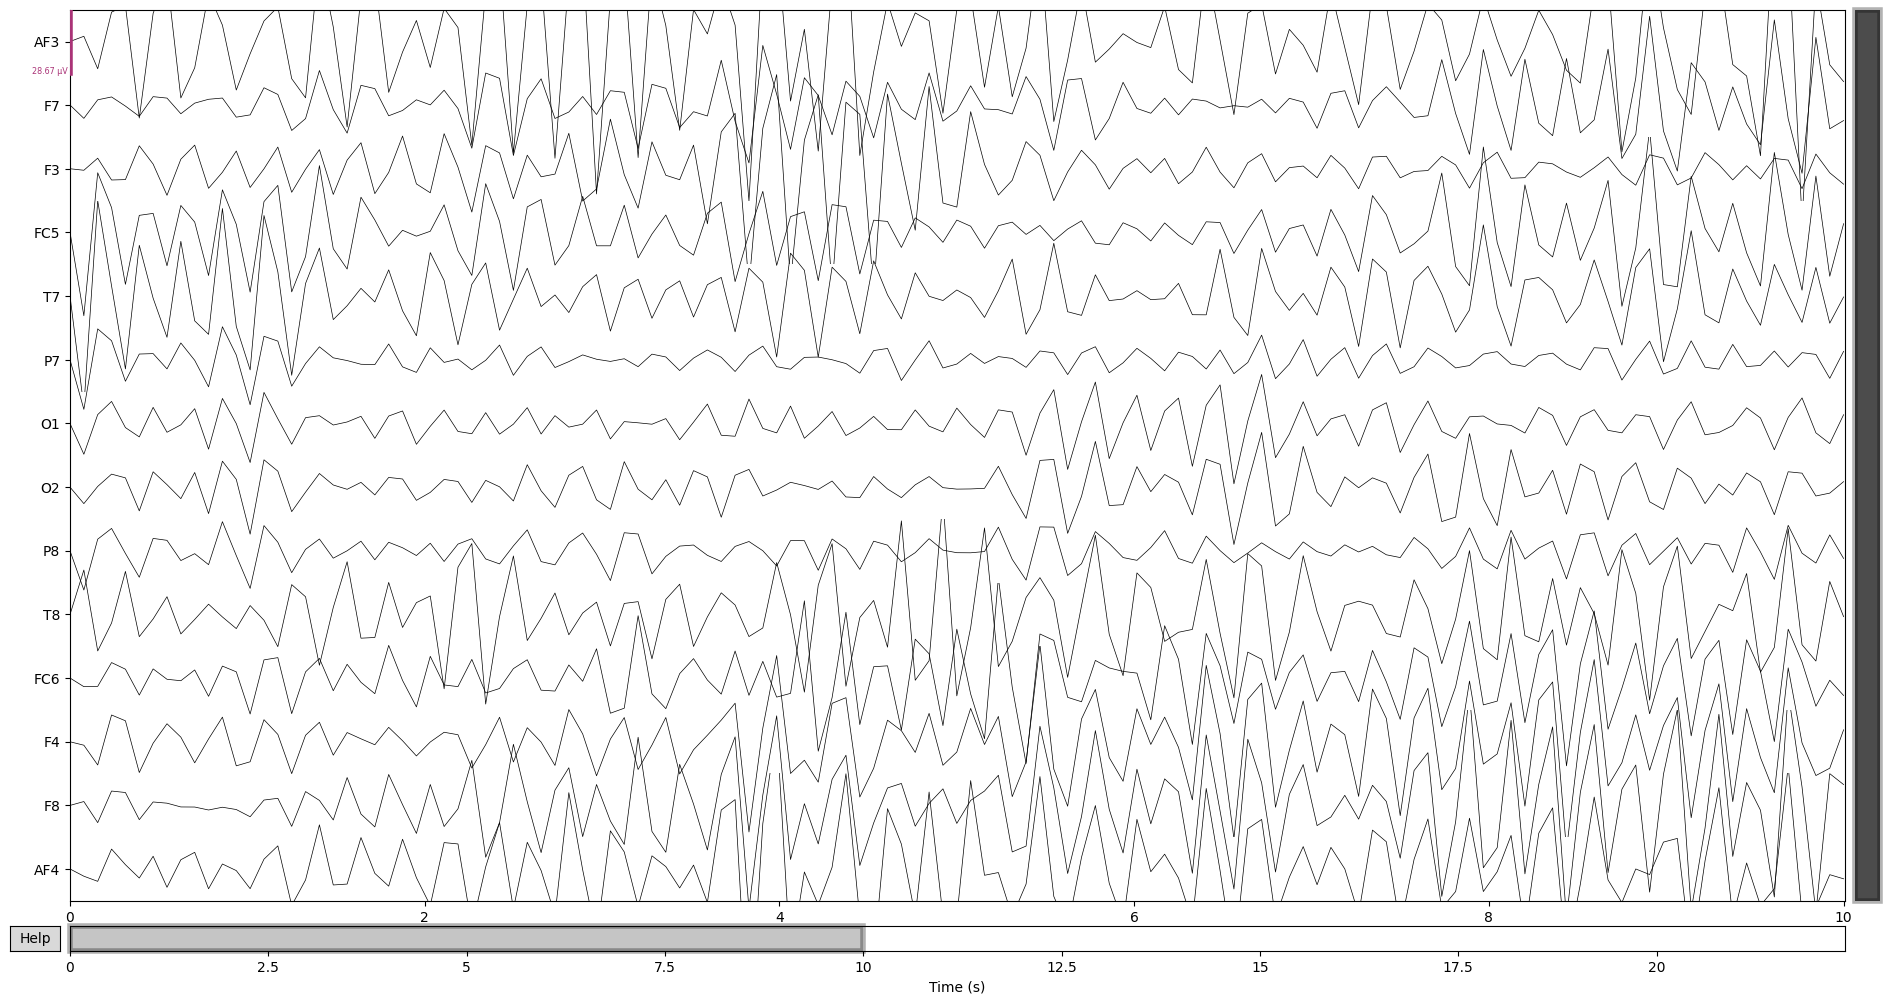

In [18]:
delta_waves = filter(raw,1,4)
delta_waves.plot(scalings = "auto")